<a href="https://colab.research.google.com/github/Amelia-ZJ/DSC530/blob/main/Week_5_Assignments_AFarrell_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2  Exercise

Modeling Distributions and PDFs

Amelia Farrell

DSC520

1/10/21


In [ ]:
# Loading packages needed
from __future__ import print_function, division

%matplotlib inline

import numpy as np
from scipy.stats import kurtosis, skew
import thinkstats2
import thinkplot
import brfss

# Chapter 5

## Page 62: 5-1
In the BRFSS (see “The lognormal Distribution” on page 56), the distribution of heights is roughly normal with parameters…

In order to join Blue Man Group, you have to be male between 5’10” and 6’1”. What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [ ]:
# Importing scipy.stats for objects representing analytic distributions
import scipy.stats

# Data for distribution of heights with parameters µ = 178 cm and σ = 7.7 cm for men.
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [ ]:
# Calculation men between 5'10" and 6'1
# 5'10" = 177.8 cm, 6'1" = 185.4cm
low = dist.cdf(177.8) 
high = dist.cdf(185.4)  
print(round((high-low)*100),'percent of men are between 5 feet 10 inch and 6 feet 1 inch tall') 

34 percent of men are between 5 feet 10 inch and 6 feet 1 inch tall



## Page 63: 5-2
To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto...

In [ ]:
# Using the scipy.stats.pareto, we will sett the parameters xm = 1 meter and α = 1.7.
alpha = 1.7
xmin = 1 
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

Plot the distibution

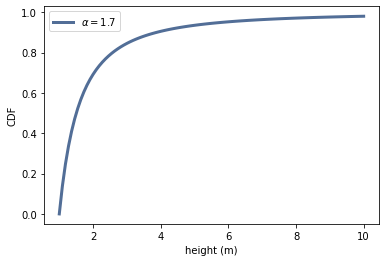

In [ ]:
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(xlabel='height (m)', ylabel='CDF')

What is the mean human height in Pareto world?

In [ ]:
dist.mean()

2.428571428571429

What fraction of people are shorter than the mean?

In [ ]:
dist.cdf(dist.mean())

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km? You could use dist.cdf or dist.sf.

In [ ]:
(1 - dist.cdf(1000)) * 7e9, dist.sf(1000) * 7e9

(55602.976430479954, 55602.97643069972)

How tall do we expect the tallest person to be?

In [ ]:
dist.sf(600000) * 7e9   

1.0525455861201714

# Chapter 6

## Pages 75-76: 6-1
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is…

In [ ]:
# Improt data
import hinc
income_df = hinc.ReadData()

In [ ]:
# Create InterpolateSample function
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.
    Assumes that log10 income is uniform in each range.
    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range
    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [ ]:
# Using InterpolateSample to model the data
log_sample = InterpolateSample(income_df, log_upper = 6.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Plot of the logged Household income CDF


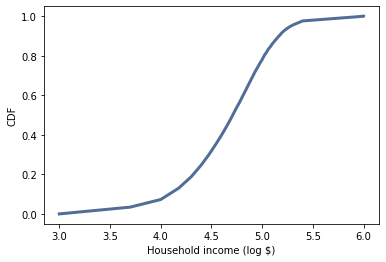

In [ ]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

Compute the median, mean, skewness and Pearson’s skewness of the resulting 
sample.

In [ ]:
# Creating the RawMoment function for computing sums of powers
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [ ]:
# Creating CentralMoment function for computing powers of distances from the mean.
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [ ]:
# Creating the Pearson's median skewness function
def PearsonMedianSkewness(xs):
    median = np.median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [ ]:
sample = np.power(10, log_sample)

Sample_Mean = sample.mean()
Sample_Median = np.median(sample)
Sample_Skew = skew(sample)
Sample_Pearson = PearsonMedianSkewness(sample)

values = [Sample_Mean, Sample_Median, Sample_Skew, Sample_Pearson]
  
print('\n'.join(map(str, values)))

74278.7075311872
51226.93306562372
4.949920244429585
0.7361105192428847


What fraction of households report a taxable income below the mean?

In [ ]:
cdf = thinkstats2.Cdf(sample)
percentofHouseholds = cdf.Prob(Sample_Mean)
print(round(percentofHouseholds, 2)*100, "percent of households report a taxable income below the mean")

66.0 percent of households report a taxable income below the mean


How do the results depend on the assumed upper bound? - It is based on the assumption that the highest income is one million dollars. However, we know that this is not correct. We know that there are indivuals making millions of dollars a year. If we were to include their income in the distribution, the skew would certailty look alot different. Meaning that the results do depend on the assumed upper bound. Without more testing, we do not know exzactly how much the skew is dependent on the upper bound for this particular data set.